In [23]:
import numpy as np 
import pandas as pd 
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score

# Data exploration

In [7]:
df = pd.read_csv("./data/Global EV 2023.csv")

In [8]:
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00046
3,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.00000


In [9]:
df.shape

(9542, 8)

In [10]:
df["category"].unique()

array(['Historical', 'Projection-STEPS', 'Projection-APS'], dtype=object)

In [11]:
df["parameter"].unique()

array(['EV stock', 'EV sales share', 'EV stock share', 'EV sales',
       'EV charging points', 'Electricity demand', 'Oil displacement Mbd',
       'Oil displacement, million lge'], dtype=object)

In [12]:
df["mode"].unique()

array(['Cars', 'EV', 'Buses', 'Vans', 'Trucks'], dtype=object)

In [13]:
df["year"].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2010, 2025, 2030], dtype=int64)

In [14]:
df["unit"].unique()

array(['Vehicles', 'percent', 'charging points', 'GWh',
       'Milion barrels per day', 'Oil displacement, million lge'],
      dtype=object)

One can see that each column has different types of values with sometimes different units; this dataset needs cleaning in order for us to draw accurate, sensible insights.

# EDA

Most popular countries to sell electrict vehicles

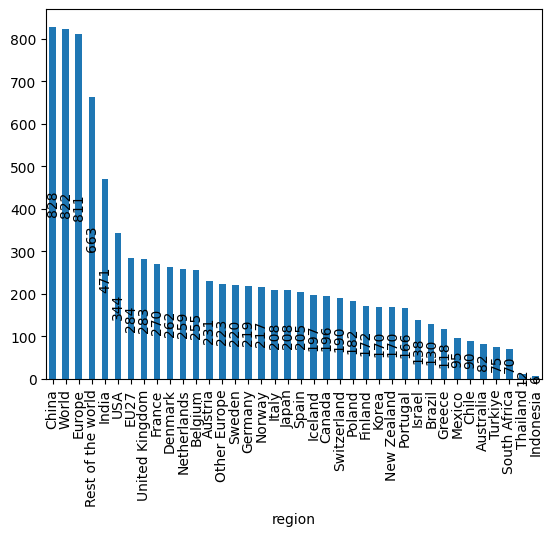

In [15]:
counts = df["region"].value_counts()
fig, axes = plt.subplots()
counts.plot(kind="bar", ax=axes)
for container in axes.containers:
    axes.bar_label(container, rotation=90, label_type="center")
plt.show()

Most popular categories

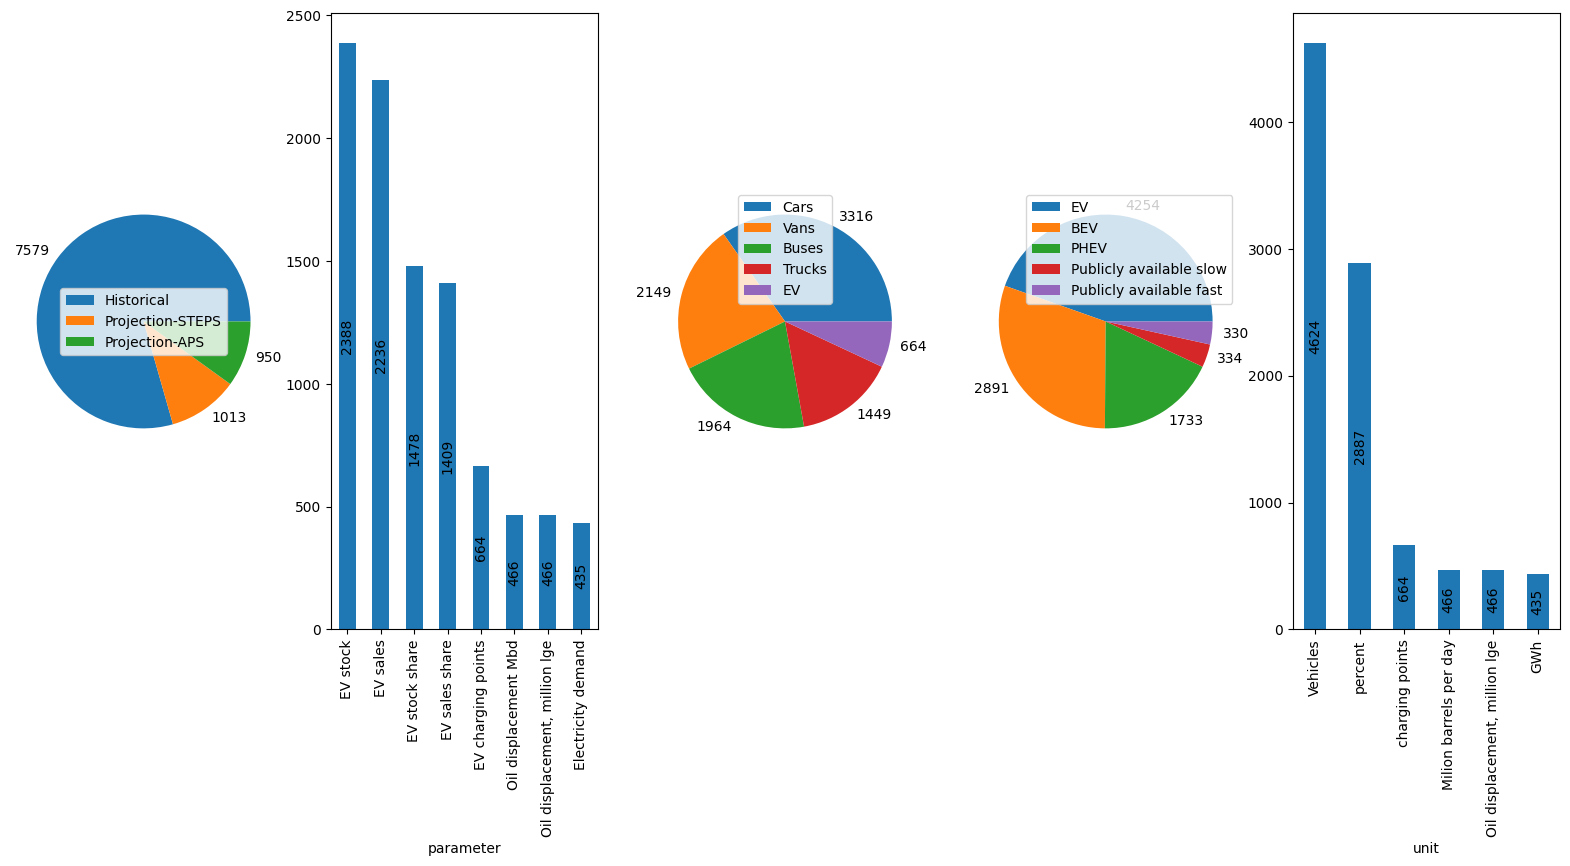

In [16]:
categoricals = ["category", "parameter", "mode", "powertrain", "unit"]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 8))
for i in range(5):
    counts = df[categoricals[i]].value_counts()
    if len(counts)>5:
        counts.plot(kind="bar", ax=axes[i])
        for container in axes[i].containers:
            axes[i].bar_label(container, rotation=90, label_type="center")
    else:
        axes[i].pie(counts, labels=counts)
        axes[i].legend(counts.index)
plt.show()

# Encoding values

In [17]:
le = LabelEncoder()

for i in df.columns[:-1]:
    if i != "year":
        df[i] = le.fit_transform(df[i])

# Scaling values

In [18]:
data = df.values
scaler = MinMaxScaler()

data = scaler.fit_transform(data)

x = data[:, :-1]
y = data[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

In [19]:
def training(model):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    print("MSE: ", mse)
    print("R2: ", r2)

# Defining models

In [20]:
rfr = RandomForestRegressor()
abr = AdaBoostRegressor(learning_rate=0.9)
svr = SVR(C=0.9)
lnr = LinearRegression()
xgb = XGBRegressor(learning_rate=0.9)

models = [rfr, abr, svr, lnr, xgb]
names = ["Random Forest", "Ada Boost", "Support Vectors", "Linear Regression", "XGB"]

# Results

In [21]:
for i, j in zip(models, names):
    print("*"*50)
    print(j)
    training(i)
    print()

**************************************************
Random Forest
MSE:  0.00011451822164150897
R2:  0.7462064758196059

**************************************************
Ada Boost
MSE:  0.00017858282879180384
R2:  0.6042274772738198

**************************************************
Support Vectors
MSE:  0.0014167717549205113
R2:  -2.139827806321673

**************************************************
Linear Regression
MSE:  0.00044308007907332535
R2:  0.018052733003781407

**************************************************
XGB
MSE:  4.660959610807225e-05
R2:  0.8967045288746891

